In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv('weight-height.csv')

In [7]:
df.head()

,weight,height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

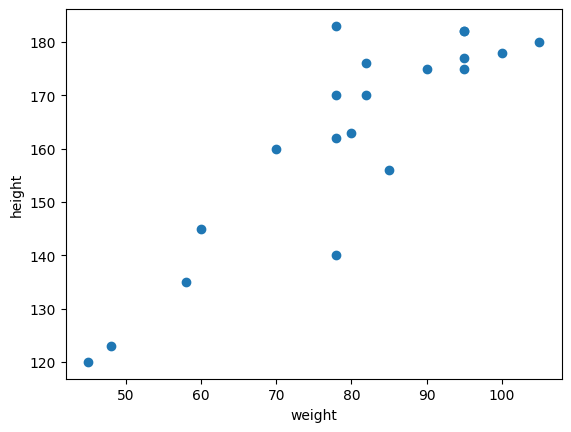

In [9]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('weight')
plt.ylabel('height')

In [10]:
df.corr()

,weight,height
weight,1.000000,0.884989
height,0.884989,1.000000


In [19]:
#split into dependent and independent features
x=df[['weight']]
y=df['height']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [23]:
x_train.shape,y_test.shape

((15, 1), (5,))

In [24]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.16749785],
       [ 1.088736  ],
       [-1.4976278 ],
       [ 0.34977491],
       [ 1.82769709],
       [-0.16749785],
       [-2.38438111],
       [-0.16749785],
       [-0.16749785],
       [-0.75866672],
       [ 1.088736  ],
       [ 0.71925546],
       [ 0.12808659],
       [ 0.12808659],
       [-0.01970563]])

In [25]:
x_test=scaler.transform(x_test)
x_test

array([[-2.60606944],
       [ 1.45821655],
       [ 1.088736  ],
       [-1.64542002],
       [ 1.088736  ]])

In [26]:
#Apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [27]:
regression.coef_,regression.intercept_

(array([13.1781394]), 164.0)

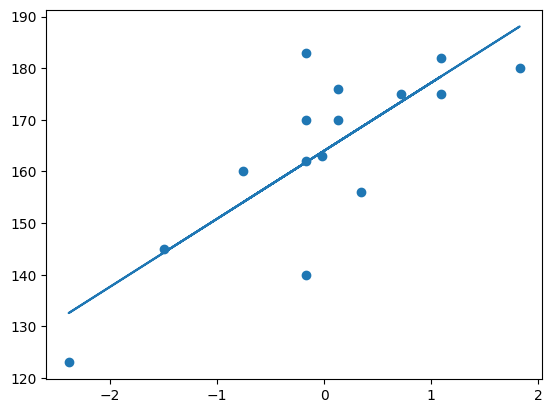

In [28]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

In [30]:
#prediction for test data
y_pred=regression.predict(x_test)
y_pred

array([129.6568537 , 183.21658091, 178.3475148 , 142.31642559,
       178.3475148 ])

In [32]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
mse,mae,rmse

(37.83081351021197, 5.4379720415493695, 6.150675858002271)

In [33]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9428399409068476

In [34]:
#predicting for new data
height=regression.predict(scaler.transform([[72]]))
height

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.9498107])